In [ ]:
import tensorflow as tf

In [ ]:
# Load Data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Noralize Data
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
# Build the Model
model = tf.keras.models.Sequential([
  # Input 28 x 28  
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the Model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.2929 - accuracy: 0.9155 - val_loss: 0.1377 - val_accuracy: 0.9576
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1429 - accuracy: 0.9574 - val_loss: 0.0964 - val_accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1068 - accuracy: 0.9675 - val_loss: 0.0860 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0878 - accuracy: 0.9729 - val_loss: 0.0799 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0744 - accuracy: 0.9764 - val_loss: 0.0768 - val_accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0660 - accuracy: 0.9790 - val_loss: 0.0742 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0582 - accuracy: 0.9814 - val_loss: 0.0711 - val_accuracy

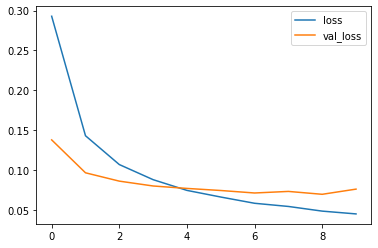

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

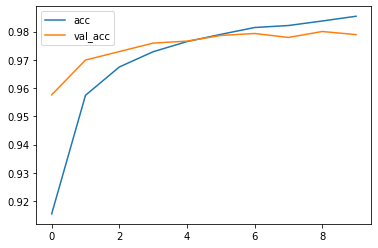

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9789
[0.07594626396894455, 0.9789000153541565]


313/313 [==============================] - 1s 1ms/step
Confusion matrix, without normalization
[[ 971    1    1    0    0    1    4    1    0    1]
 [   0 1126    4    0    0    0    2    0    3    0]
 [   4    0 1012    0    1    0    2    5    8    0]
 [   1    0    8  975    0    7    0    5    6    8]
 [   0    1    0    0  968    0    6    2    0    5]
 [   3    0    0    5    2  866    6    1    4    5]
 [   4    3    1    0    3    1  946    0    0    0]
 [   1    7   10    3    0    0    0 1001    1    5]
 [   5    0    3    2    4    3    1    5  943    8]
 [   1    5    0    3   12    1    1    4    1  981]]


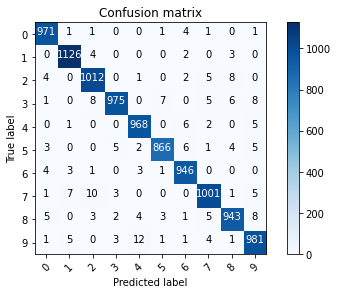

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10))) 

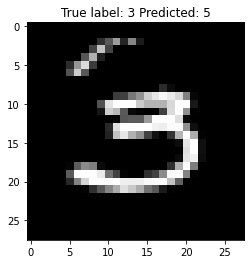

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));